In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk import pos_tag
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
df = pd.read_csv('headlines.csv',header=None)

In [5]:
df.head()

,0
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...


In [63]:
#Reading first headline
print(df[0][0])     #column

Budget to set scene for election
 
 Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.
 
 Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.
 
 - Increase in the stamp duty threshold from Â£60,000 
  - A freeze on petrol duty 
  - An extension of tax credit scheme for poorer families 
  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chanc

**Data Preprocessing**

In [80]:
swords = stopwords.words('english')
swords.append('said')

def clean_text(sent):
    tokens1= word_tokenize(sent)
    tokens2 = [token for token in tokens1 if token.isalpha()]
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]
    return tokens3

sent = "Hello friends! How are you? I like Python Programming."
clean_text(sent)

['hello', 'friends', 'like', 'python', 'programming']

In [81]:
def lemmatize(word):
    tag = pos_tag([word])
    pos='n'
    wnl=WordNetLemmatizer()
    if(tag[0][1].startswith('N')):
        pos='n'
    if(tag[0][1].startswith('V')):
        pos='v'
    if(tag[0][1].startswith('J')):
        pos='a'
    if(tag[0][1].startswith('R')):
        pos='r'
    return(wnl.lemmatize(word,pos=pos))


lemmatize('better')

'well'

In [92]:
swords = stopwords.words('english')
swords.append('said')

def clean_text(sent):
    tokens1= word_tokenize(sent)
    tokens2 = [token for token in tokens1 if token.isalpha()]
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]
    tokens4 = [lemmatize(token) for token in tokens3]
    return tokens4

clean_text(sent)

['hello', 'friend', 'like', 'python', 'program']

**Crating cleaned data and plot wordcloud**

In [93]:
#clean_text(df[0].to_string())

text = df[0].apply(clean_text)
cleaned = text
cleaned = cleaned[0]
cleaned

['budget',
 'set',
 'scene',
 'election',
 'gordon',
 'brown',
 'seek',
 'put',
 'economy',
 'centre',
 'labour',
 'bid',
 'third',
 'term',
 'power',
 'delivers',
 'ninth',
 'budget',
 'gmt',
 'expect',
 'stress',
 'importance',
 'continued',
 'economic',
 'stability',
 'low',
 'unemployment',
 'interest',
 'rate',
 'chancellor',
 'expect',
 'freeze',
 'petrol',
 'duty',
 'raise',
 'stamp',
 'duty',
 'threshold',
 'conservative',
 'lib',
 'dems',
 'insist',
 'voter',
 'face',
 'high',
 'tax',
 'labour',
 'treasury',
 'official',
 'giveaway',
 'mr',
 'brown',
 'thought',
 'spare',
 'increase',
 'stamp',
 'duty',
 'threshold',
 'freeze',
 'petrol',
 'duty',
 'extension',
 'tax',
 'credit',
 'scheme',
 'poorer',
 'family',
 'possible',
 'help',
 'pensioner',
 'stamp',
 'duty',
 'threshold',
 'rise',
 'intend',
 'help',
 'first',
 'time',
 'buyer',
 'likely',
 'theme',
 'three',
 'main',
 'party',
 'general',
 'election',
 'manifesto',
 'ten',
 'year',
 'ago',
 'buyer',
 'much',
 'great',

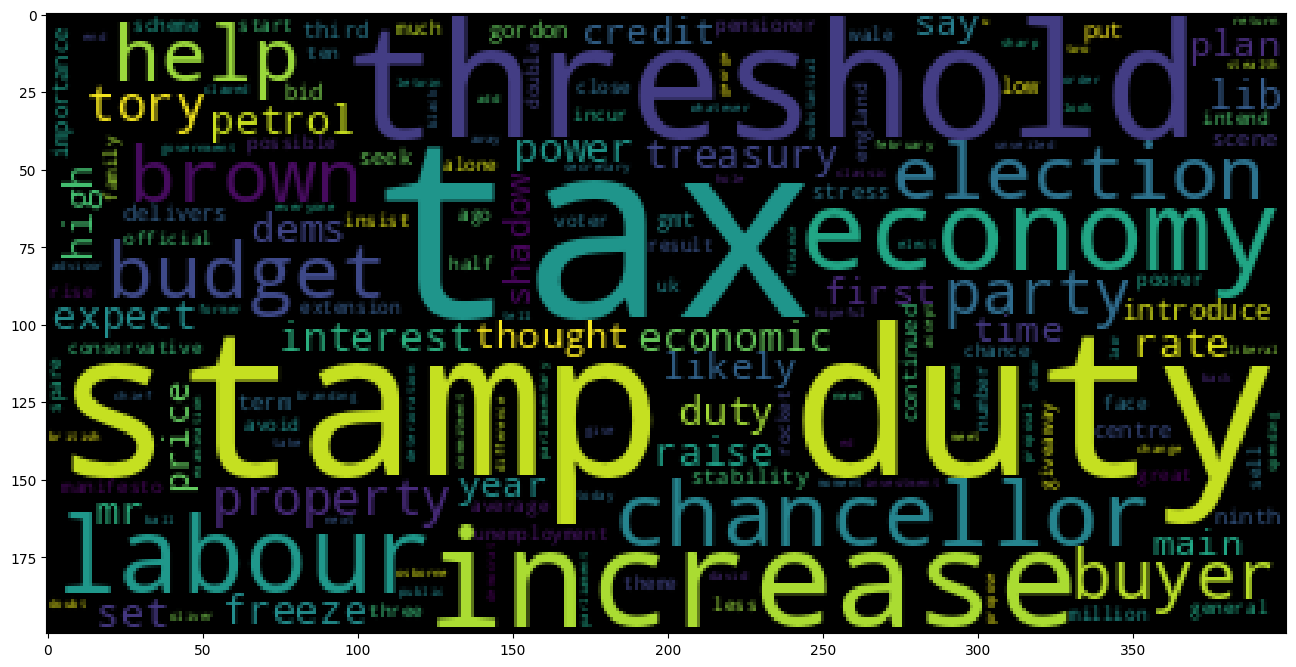

In [94]:
wcloud = WordCloud(background_color='black').generate(' '.join(cleaned)) # instead ' '.join(cleaned) can use 'text.to_string()'
plt.figure(figsize=(16,9))
plt.imshow(wcloud)

**TF*IDF Vectorizer**

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
tfidf = TfidfVectorizer(analyzer=clean_text)
x_new = tfidf.fit_transform(df[0])
x_new.shape

(2225, 21406)

**K-means Cluster object**

In [87]:
from sklearn.cluster import KMeans


In [88]:
km= KMeans(random_state=0)
km.fit(x_new)
labels= km.predict(x_new)
labels

array([6, 5, 6, ..., 2, 5, 2], dtype=int32)

In [89]:
km.inertia_ #sum squared error

2066.2593969918394

**Elbow Method**

In [90]:
sse=[]

for k in range(1,16):
    km= KMeans(n_clusters=k,random_state=0,n_init='auto')
    km.fit(x_new)
    km.predict(x_new)
    sse.append(km.inertia_)

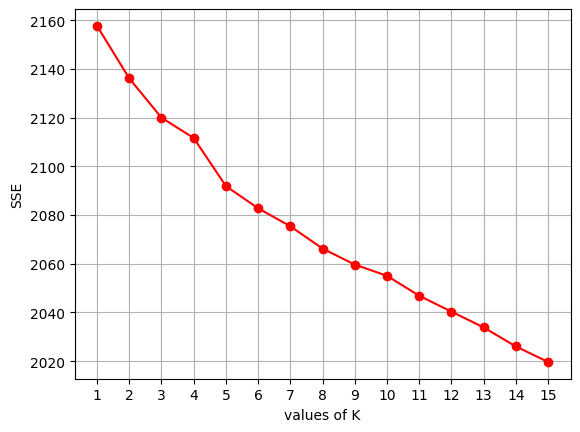

In [91]:
plt.xlabel("values of K")
plt.ylabel("SSE")
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker="o",color='r')


**Create the cluster**

In [100]:
km = KMeans(n_clusters=5,random_state=0,n_init='auto')
km.fit(x_new)
labels = km.predict(x_new)
km.labels_   # or labels

array([4, 3, 4, ..., 3, 3, 3], dtype=int32)

**Separate clusters**

In [110]:
# df['labels'] = km.labels_
# zero = df[df['labels']==0]
# one = df[df['labels']==1]
# two = df[df['labels']==2]
# three = df[df['labels']==3]
# four = df[df['labels']==4]

zero = df[labels==0]
one = df[labels==1]
two = df[labels==2]
three = df[labels==3]
four = df[labels==4]

In [111]:
print('Cluster-0' ,len(zero))
print('Cluster-1' ,len(one))
print('Cluster-2' ,len(two))
print('Cluster-3' ,len(three))
print('Cluster-4' ,len(four))

Cluster-0 377
Cluster-1 347
Cluster-2 519
Cluster-3 699
Cluster-4 283


In [112]:
zero

,0,labels
72,MPs issued with Blackberry threat\n \n MPs wil...,0
247,Game warnings 'must be clearer'\n \n Violent v...,0
300,MPs issued with Blackberry threat\n \n MPs wil...,0
373,UK firms 'embracing e-commerce'\n \n UK firms ...,0
928,Digital UK driven by net and TV\n \n The UK's ...,0
...,...,...
1820,News Corp eyes video games market\n \n News Co...,0
1861,Brussels raps mobile call charges\n \n The Eur...,0
2054,Making your office work for you\n \n Our missi...,0
2138,Orange colour clash set for court\n \n A row o...,0


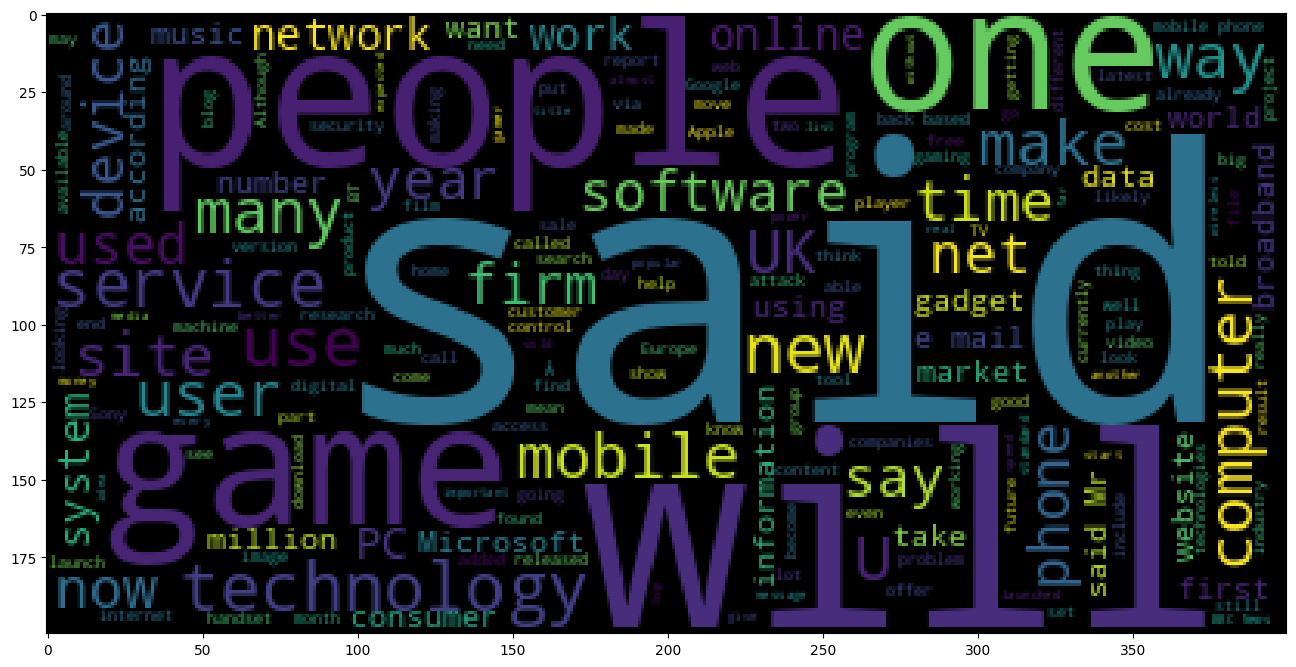

In [118]:
wcloud = WordCloud(background_color='black').generate(' '.join(zero[0]))
plt.figure(figsize=(16,9))
plt.imshow(wcloud)

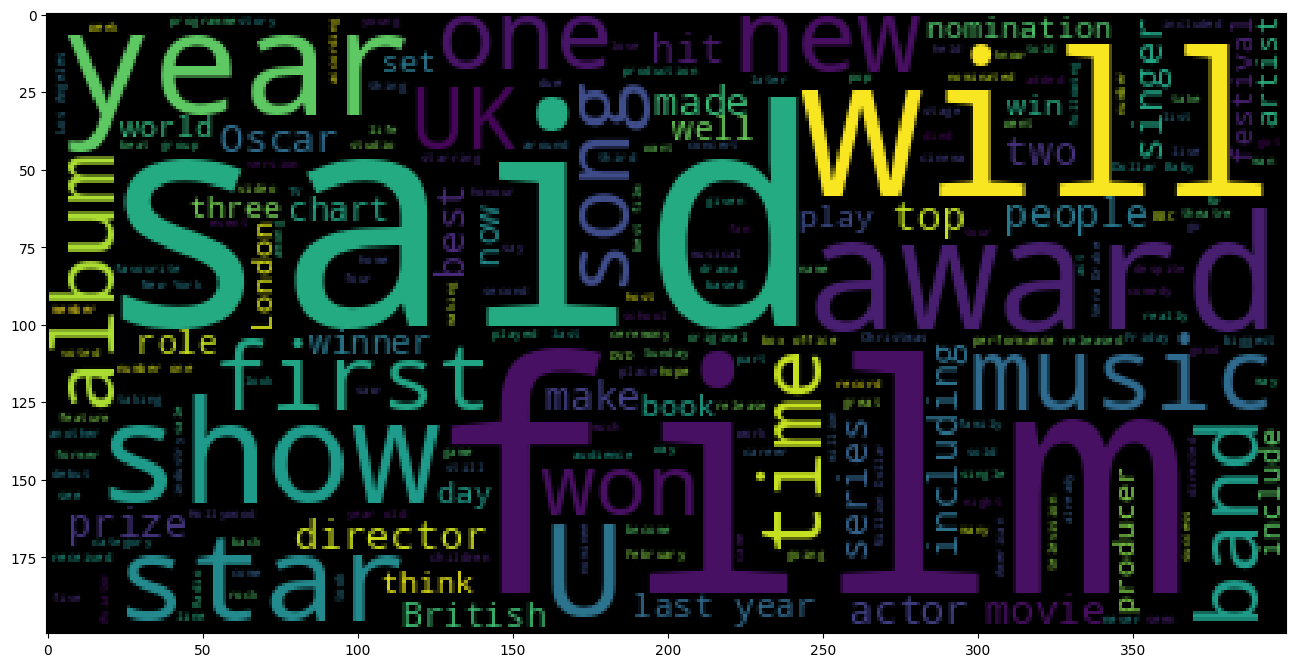

In [119]:
wcloud = WordCloud(background_color='black').generate(' '.join(one[0]))
plt.figure(figsize=(16,9))
plt.imshow(wcloud)

In [120]:
from nltk import FreqDist


In [127]:
new = ' '.join(zero[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

#label =

[('people', 888), ('also', 492), ('Mr', 476), ('technology', 469), ('new', 444), ('would', 444), ('could', 432), ('mobile', 423), ('music', 404), ('one', 377)]


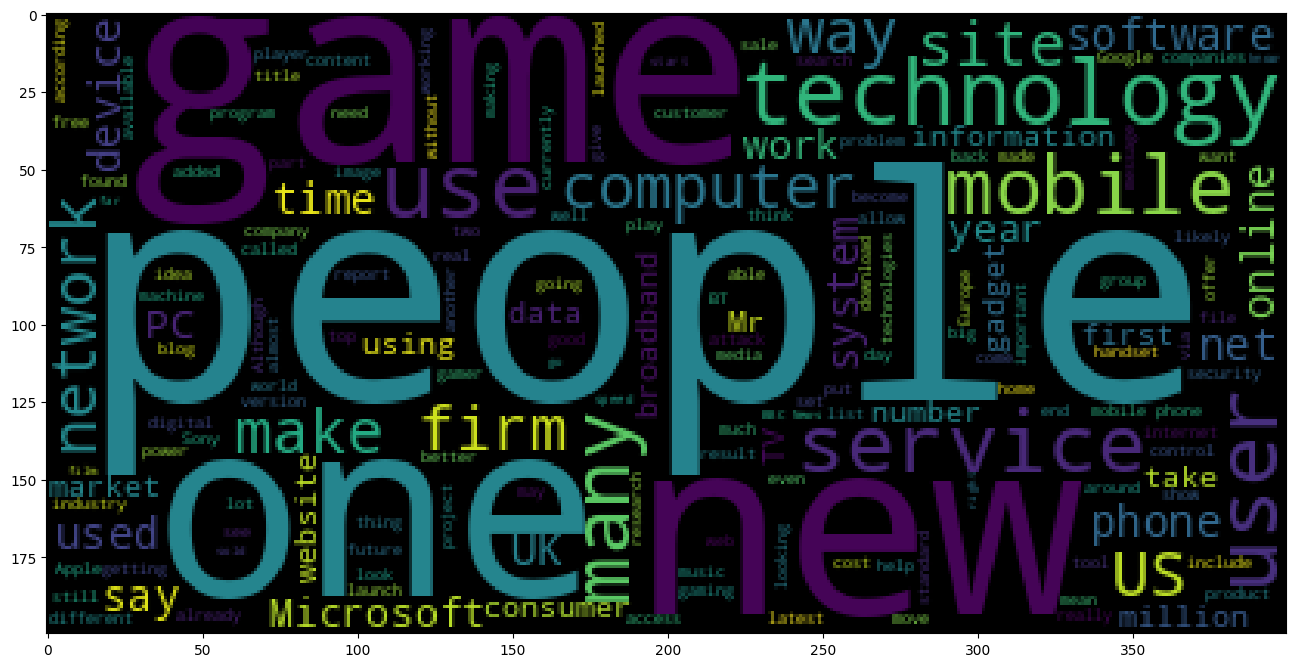

In [129]:
wcloud = WordCloud(background_color='black').generate(' '.join(clean))
plt.figure(figsize=(16,9))
plt.imshow(wcloud)

In [123]:
new = ' '.join(one[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)
#label =

[('film', 671),
 ('best', 567),
 ('also', 344),
 ('year', 327),
 ('music', 312),
 ('show', 288),
 ('US', 270),
 ('one', 257),
 ('first', 228),
 ('UK', 220)]

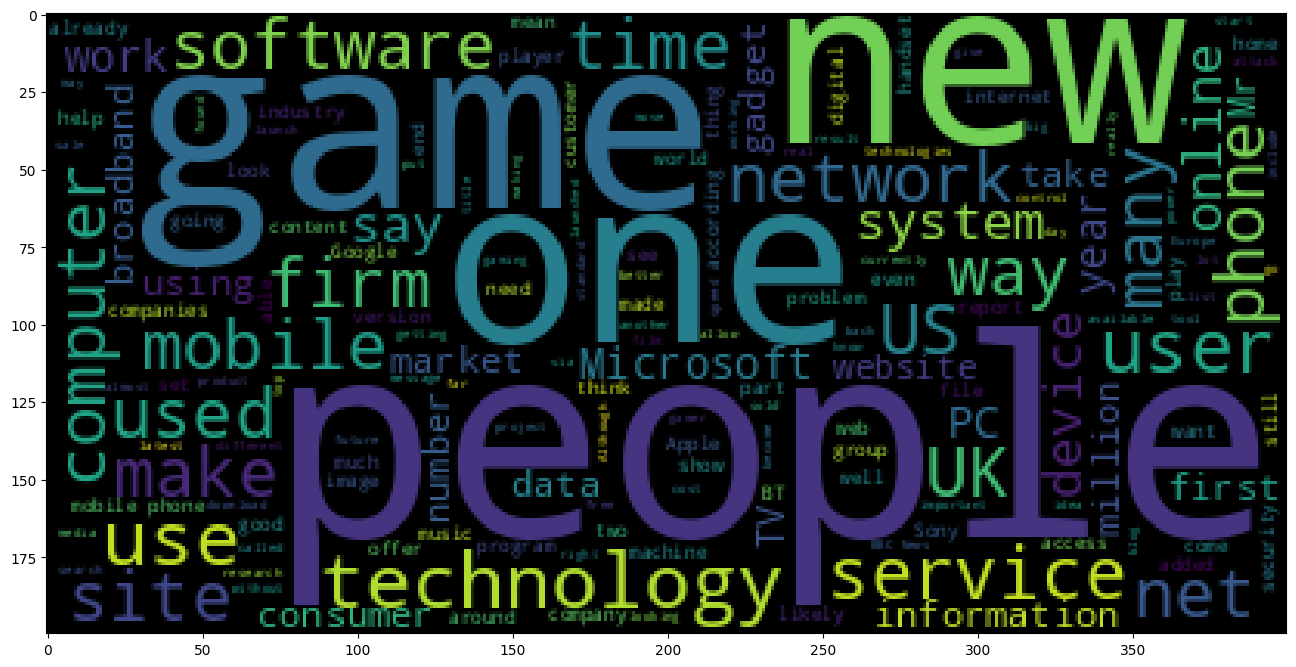

In [130]:
wcloud = WordCloud(background_color='black').generate(' '.join(clean))
plt.figure(figsize=(16,9))
plt.imshow(wcloud)

In [131]:
new = ' '.join(two[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)
#label =


[('game', 519),
 ('England', 465),
 ('first', 440),
 ('would', 422),
 ('win', 412),
 ('last', 369),
 ('one', 344),
 ('two', 342),
 ('also', 341),
 ('time', 340)]

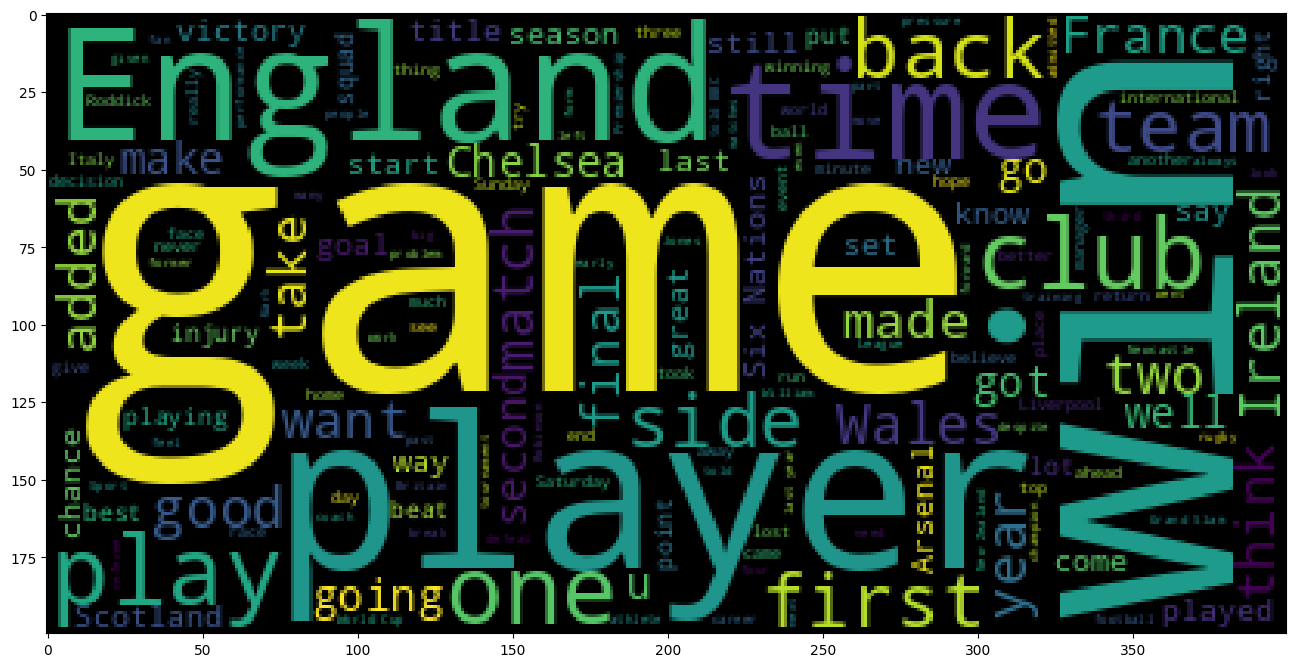

In [132]:
wcloud = WordCloud(background_color='black').generate(' '.join(clean))
plt.figure(figsize=(16,9))
plt.imshow(wcloud)

In [133]:
new = ' '.join(three[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

#label =

[('US', 918),
 ('Mr', 847),
 ('would', 758),
 ('year', 758),
 ('also', 594),
 ('government', 525),
 ('could', 458),
 ('company', 448),
 ('new', 447),
 ('market', 428)]

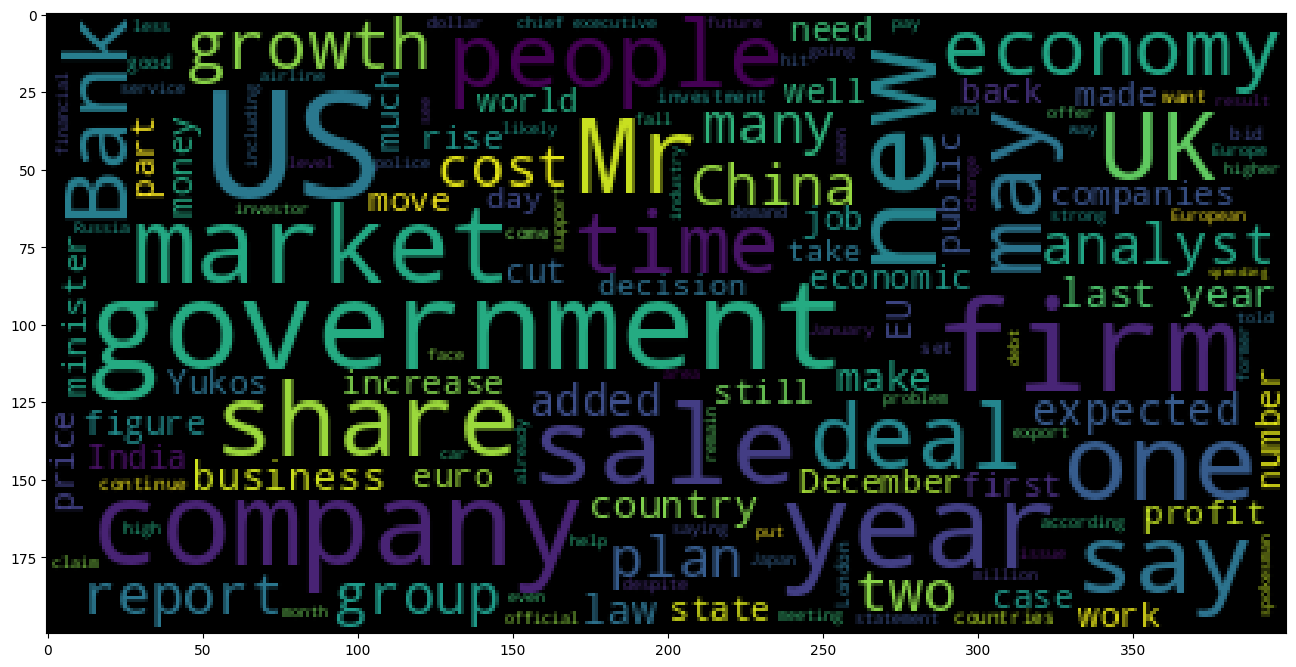

In [134]:
wcloud = WordCloud(background_color='black').generate(' '.join(clean))
plt.figure(figsize=(16,9))
plt.imshow(wcloud)

In [135]:
new = ' '.join(four[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

#label = Politics

[('Mr', 1487),
 ('would', 822),
 ('Labour', 728),
 ('election', 547),
 ('Blair', 545),
 ('government', 507),
 ('people', 431),
 ('party', 412),
 ('Brown', 376),
 ('also', 331)]

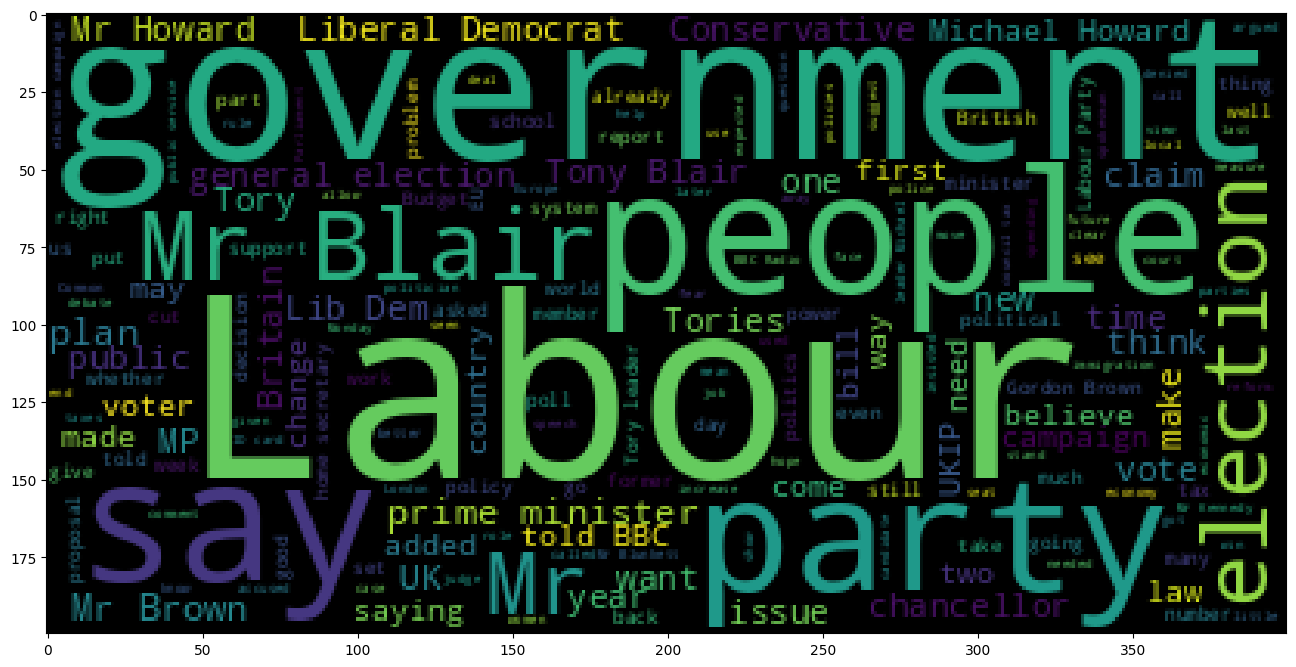

In [136]:
wcloud = WordCloud(background_color='black').generate(' '.join(clean))
plt.figure(figsize=(16,9))
plt.imshow(wcloud)